# Save annual data

Save annual-mean data.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
from multiprocessing import Pool

import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman

import config

<ipython-input-2-18ad43c58af6>:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
ID = config.ID

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [5]:
STITCHED_DIR = "./{}-country-crunch-stitched".format(ID)
STITCHED_NORMALISED_DIR = "./{}-country-crunch-stitched-normalised".format(ID)

STITCHED_DIR = "./{}-country-crunch-stitched-popn-weighted".format(ID)
STITCHED_NORMALISED_DIR = (
    "./{}-country-crunch-stitched-normalised-popn-weighted".format(ID)
)

MAX_WORKERS = 60

<IPython.core.display.Javascript object>

In [6]:
load_dir = STITCHED_DIR
# load_dir = STITCHED_NORMALISED_DIR

<IPython.core.display.Javascript object>

In [7]:
crunched_files = [
    f
    for f in glob.glob(os.path.join(load_dir, "**", "*.nc"), recursive=True)
    if "ssp" in f
]
crunched_files[:2]
crunched_files

['./20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CanESM5_ssp245_r1i1p1f1_gn_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CESM2-WACCM_ssp585_r4i1p1f1_gn_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CESM2-WACCM_ssp126_r1i1p1f1_gn_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_NESM3_ssp245_r1i1p1f1_gn_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_IPSL-CM6A-LR_ssp460_r2i1p1f1_gr_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CanESM5_ssp119_r10i1p1f1_gn_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_EC-Earth3-Veg_ssp119_r1i1p1f1_gr_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CanESM5_ssp370_r1i1p1f1_gn_185001-210012.nc',
 './20210412-country-crunch-stitched-popn-weig

<IPython.core.display.Javascript object>

In [8]:
# [f for f in crunched_files if "CM4" in f]

<IPython.core.display.Javascript object>

In [9]:
dud_files = [
    "{}/netcdf-scm_tas_Amon_MRI-ESM2-0_ssp370-lowNTCF_r1i1p1f1_gn_185001-205512.nc".format(
        load_dir
    )
]
crunched_files = [f for f in crunched_files if f not in dud_files]

<IPython.core.display.Javascript object>

In [10]:
def load_file(f):
    return scmdata.ScmRun.from_nc(f)


all_dat = []
with Pool(MAX_WORKERS) as pool:
    all_dat = pool.map(load_file, crunched_files)

all_dat = scmdata.run_append(
    [scmdata.ScmRun(s.timeseries(time_axis="year-month")) for s in tqdman.tqdm(all_dat)]
)

/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_varia

  0%|          | 0/434 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [11]:
cms = all_dat.get_unique_meta("climate_model")
display(len(cms))
sorted(cms)

48

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CAS-ESM2-0',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'CanESM5-CanOE',
 'E3SM-1-1',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM5A2-INCA',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'KIOST-ESM',
 'MCM-UA-1-0',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL']

<IPython.core.display.Javascript object>

In [12]:
all_dat_annual_mean = all_dat.time_mean("AC")
all_dat_annual_mean

<scmdata.ScmRun (timeseries: 2588, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	      activity_id climate_model grid member_id mip_era        model  \
	0     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	1     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	2     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	3     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	4     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	...           ...           ...  ...       ...     ...          ...   
	2583  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2584  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2585  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2586  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2587  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	
	              

<IPython.core.display.Javascript object>

In [13]:
out_file_name = "{}-regional_means.hdf5".format(ID)
all_dat_annual_mean.timeseries(time_axis="year").to_hdf(out_file_name, key="df")
!du -sh {out_file_name}

9.0M	20210412-regional_means.hdf5


<IPython.core.display.Javascript object>

In [14]:
del all_dat_annual_mean

<IPython.core.display.Javascript object>

## How to work with the data

In [15]:
all_dat_annual_mean_loaded = scmdata.ScmRun(pd.read_hdf(out_file_name, key="df"))
all_dat_annual_mean_loaded

<scmdata.ScmRun (timeseries: 2588, timepoints: 451)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	      activity_id climate_model grid member_id mip_era        model  \
	0     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	1     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	2     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	3     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	4     ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	...           ...           ...  ...       ...     ...          ...   
	2583  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2584  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2585  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2586  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	2587  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	
	              

<IPython.core.display.Javascript object>

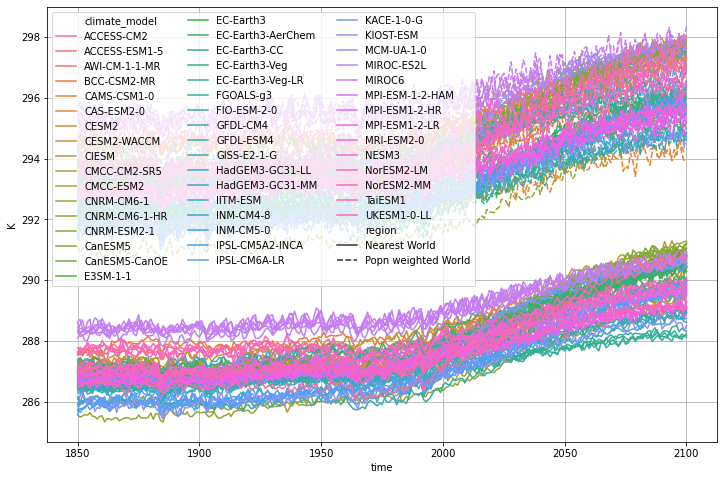

<IPython.core.display.Javascript object>

In [16]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World")
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .filter(scenario="ssp245")
    #     .filter(climate_model="TaiESM1")
    .lineplot(
        style="region",
        hue="climate_model",
        hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()

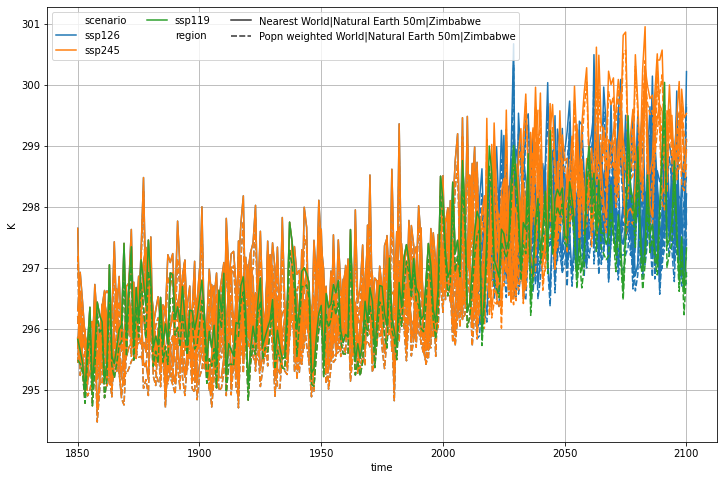

<IPython.core.display.Javascript object>

In [17]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World*Zimbabwe*")
    .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .filter(climate_model="MIROC6")
    .lineplot(
        hue="scenario",
        style="region",
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

In [18]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat_annual_mean_loaded.filter(year=mean_years)
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean
0,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World,ssp245,K,tas,air_temperature,290.880890
1,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Jamaica,ssp245,K,tas,air_temperature,303.763058
2,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Zimbabwe,ssp245,K,tas,air_temperature,298.124973
3,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World,ssp245,K,tas,air_temperature,297.524524
4,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Jamaica,ssp245,K,tas,air_temperature,303.542146
...,...,...,...,...,...,...,...,...,...,...,...,...
2583,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Jamaica,ssp126,K,tas,air_temperature,301.918347
2584,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,air_temperature,296.801315
2585,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World,ssp126,K,tas,air_temperature,296.179450
2586,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Jamaica,ssp126,K,tas,air_temperature,301.647307


<IPython.core.display.Javascript object>

In [19]:
tmp = bardf[bardf["region"] == "Nearest World"][
    ["scenario", "climate_model"]
].drop_duplicates()
display(tmp["scenario"].value_counts())
tmp

ssp585         45
ssp245         44
ssp126         43
ssp370         39
ssp119         14
ssp434          8
ssp460          7
ssp534-over     7
Name: scenario, dtype: int64

,scenario,climate_model
0,ssp245,CanESM5
6,ssp585,CESM2-WACCM
12,ssp126,CESM2-WACCM
18,ssp245,NESM3
24,ssp460,IPSL-CM6A-LR
...,...,...
2474,ssp126,CMCC-CM2-SR5
2480,ssp370,IPSL-CM5A2-INCA
2534,ssp126,GISS-E2-1-G
2546,ssp245,UKESM1-0-LL


<IPython.core.display.Javascript object>

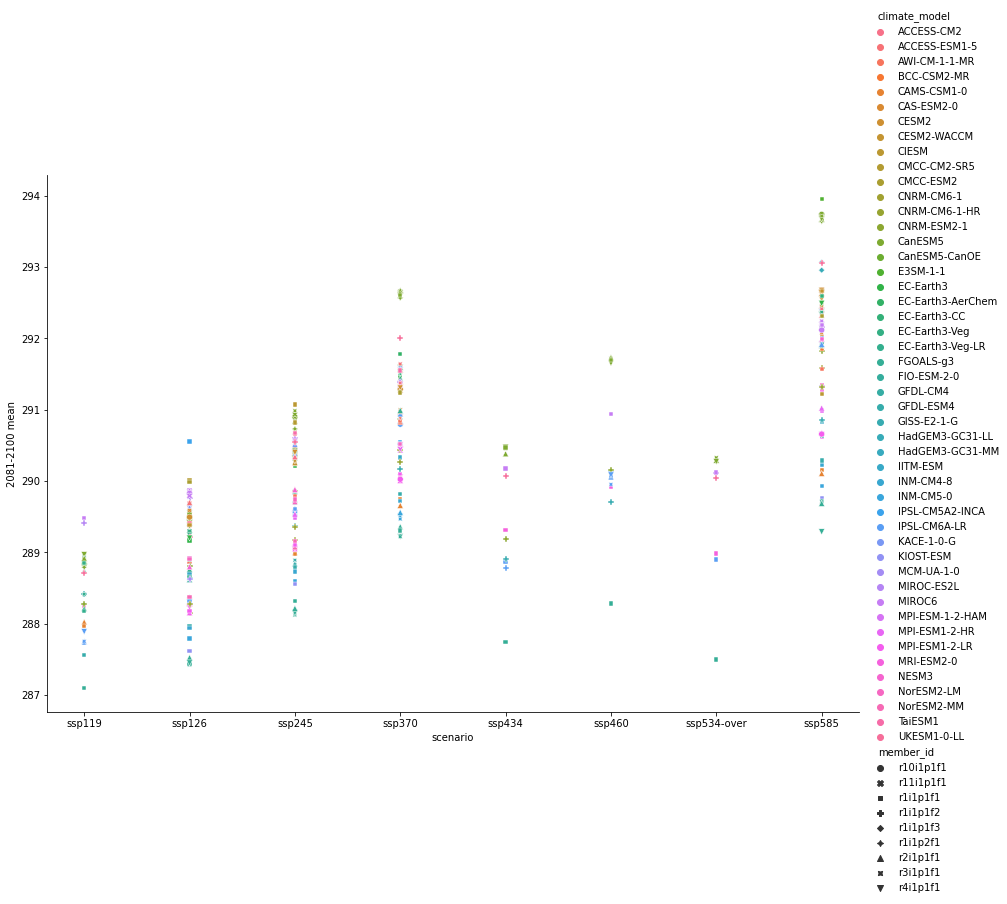

<IPython.core.display.Javascript object>

In [20]:
sns.relplot(
    data=bardf[bardf["region"] == "Nearest World"].sort_values(by="scenario"),
    #     x="climate_model",
    #     y="value",
    #     hue="scenario",
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    style="member_id",
    style_order=sorted(bardf["member_id"].unique().tolist()),
    #     estimator="median",
    height=8,
    aspect=1.5,
    #     kind="line",
    #     marker="x",
)

In [21]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat.filter(year=mean_years)
    .time_mean("AC")
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf["Population weighted"] = bardf["region"].str.contains("Popn weighted")
bardf["region"] = bardf["region"].str.replace("Popn weighted ", "")
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean,Population weighted
0,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World,ssp245,K,tas,air_temperature,290.880890,False
1,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Jamaica,ssp245,K,tas,air_temperature,303.763058,False
2,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Zimbabwe,ssp245,K,tas,air_temperature,298.124973,False
3,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World,ssp245,K,tas,air_temperature,297.524524,True
4,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Jamaica,ssp245,K,tas,air_temperature,303.542146,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Jamaica,ssp126,K,tas,air_temperature,301.918347,False
2584,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,air_temperature,296.801315,False
2585,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World,ssp126,K,tas,air_temperature,296.179450,True
2586,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Jamaica,ssp126,K,tas,air_temperature,301.647307,True


<IPython.core.display.Javascript object>

<ipython-input-22-6497382ecafc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)


done


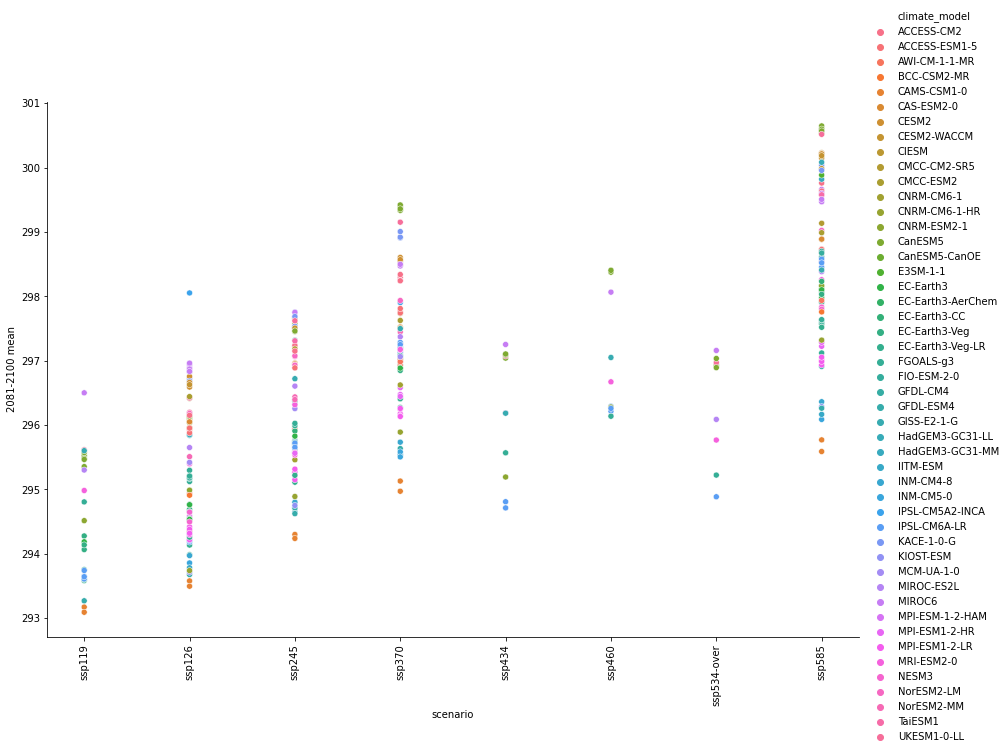

<IPython.core.display.Javascript object>

In [22]:
fg = sns.relplot(
    data=bardf[bardf["region"] == "World"].sort_values(by="scenario"),
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    height=8,
    aspect=1.5,
)
fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)
print("done")

In [23]:
import xarray as xr

<IPython.core.display.Javascript object>

In [24]:
all_dat_annual_mean_loaded._df.T

time,1850-01-01 00:00:00,1851-01-01 00:00:00,1852-01-01 00:00:00,1853-01-01 00:00:00,1854-01-01 00:00:00,1855-01-01 00:00:00,1856-01-01 00:00:00,1857-01-01 00:00:00,1858-01-01 00:00:00,1859-01-01 00:00:00,...,2291-01-01 00:00:00,2292-01-01 00:00:00,2293-01-01 00:00:00,2294-01-01 00:00:00,2295-01-01 00:00:00,2296-01-01 00:00:00,2297-01-01 00:00:00,2298-01-01 00:00:00,2299-01-01 00:00:00,2300-01-01 00:00:00
0,286.810295,286.554761,286.625950,286.780385,286.642097,286.590908,286.640932,286.632898,286.610428,286.737429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300.543777,300.008926,299.978539,300.561325,300.486041,300.461817,300.218763,300.122047,300.212374,300.405279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293.016664,293.728287,293.114118,293.117873,293.123755,293.882255,292.853425,292.963219,292.709930,293.891957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293.132484,292.996255,292.990965,293.183804,293.050545,293.041703,293.188576,292.985968,293.109133,293.221632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300.318505,299.789738,299.760868,300.336647,300.261003,300.237380,299.998528,299.903777,299.992365,300.181552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,300.290031,300.550886,300.572372,300.494115,300.661819,300.463333,300.300840,300.663946,300.304204,299.848579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2584,295.271581,294.949711,295.537658,294.955601,295.893433,295.847913,295.155518,294.849703,295.314724,294.668584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2585,294.559519,294.852087,294.583035,294.813151,295.219940,294.760633,294.525013,295.044625,294.732769,294.552678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2586,300.032338,300.290145,300.309945,300.235071,300.399310,300.200835,300.042858,300.402535,300.045265,299.595238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [25]:
all_dat_annual_mean_loaded.meta

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name
0,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World,ssp245,K,tas,air_temperature
1,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Jamaica,ssp245,K,tas,air_temperature
2,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Zimbabwe,ssp245,K,tas,air_temperature
3,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World,ssp245,K,tas,air_temperature
4,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Jamaica,ssp245,K,tas,air_temperature
...,...,...,...,...,...,...,...,...,...,...,...
2583,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Jamaica,ssp126,K,tas,air_temperature
2584,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,air_temperature
2585,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World,ssp126,K,tas,air_temperature
2586,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Jamaica,ssp126,K,tas,air_temperature


<IPython.core.display.Javascript object>

In [26]:
base_dimensions = ["variable", "unit", "region"]
base_dimensions = ["variable", "region"]
unit_name = "unit"
id_dimensions = list(
    set(all_dat_annual_mean_loaded.meta.columns) - set(base_dimensions) - {"unit"}
)

tmp = all_dat_annual_mean_loaded.timeseries(base_dimensions + id_dimensions)  # .T
tmp.columns = all_dat_annual_mean_loaded.time_points.as_cftime()
display(tmp)

ids = all_dat_annual_mean_loaded.meta[id_dimensions].drop_duplicates()
ids["_id"] = range(ids.shape[0])
ids = ids.set_index(id_dimensions)
display(ids)

unit_table = (
    all_dat_annual_mean_loaded.meta[["variable", unit_name]]
    .drop_duplicates()
    .set_index("variable")["unit"]
)
display(unit_table)

joint = tmp.reset_index().set_index(id_dimensions).join(ids)
joint = joint.reset_index(drop=True).set_index(base_dimensions + ["_id"])
joint.columns.names = ["time"]
assert (
    len(joint.index.unique()) == joint.shape[0]
), "something not unique (also caught by initial call to timeseries so this is just another check)..."
display(joint)

for_xarray = joint.T.stack(["region", "_id"])
display(for_xarray)

1850-01-01 00:00:00  \
variable region                                         grid activity_id mip_era model       scenario climate_model member_id variable_standard_name                        
tas      Nearest World                                  gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  286.810295   
         Nearest World|Natural Earth 50m|Jamaica        gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  300.543777   
         Nearest World|Natural Earth 50m|Zimbabwe       gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  293.016664   
         Popn weighted World                            gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  293.132484   
         Popn weighted World|Natural Earth 50m|Jamaica  gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  300.318505   
...                                                                                                                                                                   ...   
         Nearest World|Natural Earth 50m|Jamaica        gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  300.290031   
         Nearest World|Natural Earth 50m|Zimbabwe       gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  295.271581   
         Popn weighted World                            gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  294.559519   
         Popn weighted World|Natural Earth 50m|Jamaica  gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  300.032338   
         Popn weighted World|Natural Earth 50m|Zimbabwe gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  295.097911   

                                                                                                                                                      1851-01-01 00:00:00  \
variable region                                         grid activity_id mip_era model       scenario climate_model member_id variable_standard_name                        
tas      Nearest World                                  gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  286.554761   
         Nearest World|Natural Earth 50m|Jamaica        gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  300.008926   
         Nearest World|Natural Earth 50m|Zimbabwe       gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  293.728287   
         Popn weighted World                            gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  292.996255   
         Popn weighted World|Natural Earth 50m|Jamaica  gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature                  299.789738   
...                                                                                                                                                                   ...   
         Nearest World|Natural Earth 50m|Jamaica        gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  300.550886   
         Nearest World|Natural Earth 50m|Zimbabwe       gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  294.949711   
         Popn weighted World                            gn   ScenarioMIP CMIP6   unspecified ssp126   NorESM2-LM    r1i1p1f1  air_temperature                  294.852087 

_id
grid activity_id mip_era model       scenario climate_model member_id variable_standard_name     
gn   ScenarioMIP CMIP6   unspecified ssp245   CanESM5       r1i1p1f1  air_temperature           0
                                     ssp585   CESM2-WACCM   r4i1p1f1  air_temperature           1
                                     ssp126   CESM2-WACCM   r1i1p1f1  air_temperature           2
                                     ssp245   NESM3         r1i1p1f1  air_temperature           3
gr   ScenarioMIP CMIP6   unspecified ssp460   IPSL-CM6A-LR  r2i1p1f1  air_temperature           4
...                                                                                           ...
gn   ScenarioMIP CMIP6   unspecified ssp585   CanESM5       r2i1p1f1  air_temperature         429
                                     ssp245   MPI-ESM1-2-LR r1i1p1f1  air_temperature         430
gr   ScenarioMIP CMIP6   unspecified ssp585   IPSL-CM6A-LR  r3i1p1f1  air_temperature         431
gn   ScenarioMIP CMIP6   unspecified ssp585   MIROC6        r10i1p1f1 air_temperature         432
                                     ssp126   NorESM2-LM    r1i1p1f1  air_temperature         433

[434 rows x 1 columns]

variable
tas    K
Name: unit, dtype: object

time                                                         1850-01-01 00:00:00  \
variable region                                         _id                        
tas      Nearest World                                  350           287.178541   
         Nearest World|Natural Earth 50m|Jamaica        350           299.722806   
         Nearest World|Natural Earth 50m|Zimbabwe       350           292.797479   
         Popn weighted World                            350           292.454107   
         Popn weighted World|Natural Earth 50m|Jamaica  350           298.926324   
...                                                                          ...   
         Nearest World|Natural Earth 50m|Jamaica        42            299.023191   
         Nearest World|Natural Earth 50m|Zimbabwe       42            295.060357   
         Popn weighted World                            42            292.187464   
         Popn weighted World|Natural Earth 50m|Jamaica  42            298.658373   
         Popn weighted World|Natural Earth 50m|Zimbabwe 42            294.423435   

time                                                         1851-01-01 00:00:00  \
variable region                                         _id                        
tas      Nearest World                                  350           287.130634   
         Nearest World|Natural Earth 50m|Jamaica        350           299.502342   
         Nearest World|Natural Earth 50m|Zimbabwe       350           292.353993   
         Popn weighted World                            350           292.165247   
         Popn weighted World|Natural Earth 50m|Jamaica  350           298.719261   
...                                                                          ...   
         Nearest World|Natural Earth 50m|Jamaica        42            299.090246   
         Nearest World|Natural Earth 50m|Zimbabwe       42            294.409868   
         Popn weighted World                            42            292.130970   
         Popn weighted World|Natural Earth 50m|Jamaica  42            298.722736   
         Popn weighted World|Natural Earth 50m|Zimbabwe 42            293.760778   

time                                                         1852-01-01 00:00:00  \
variable region                                         _id                        
tas      Nearest World                                  350           287.314573   
         Nearest World|Natural Earth 50m|Jamaica        350           299.737816   
         Nearest World|Natural Earth 50m|Zimbabwe       350           292.520519   
         Popn weighted World                            350           292.689095   
         Popn weighted World|Natural Earth 50m|Jamaica  350           298.950617   
...                                                                          ...   
         Nearest World|Natural Earth 50m|Jamaica        42            299.199979   
         Nearest World|Natural Earth 50m|Zimbabwe       42            294.030566   
         Popn weighted World                            42            292.104064   
         Popn weighted World|Natural Earth 50m|Jamaica  42            298.825323   
         Popn weighted World|Natural Earth 50m|Zimbabwe 42            293.334439   

time                                                         1853-01-01 00:00:00  \
variable region                                         _id                        
tas      Nearest World                                  350           287.291790   
         Nearest World|Natural Earth 50m|Jamaica        350           299.825109   
         Nearest World|Natural Earth 50m|Zimbabwe       350           293.089121   
         Popn weighted World                            350           292.741908   
         Popn weighted World|Natural Earth 50m|Jamaica  350           299.025186   
...                                                                          ...   
         Nearest World|Natural Earth 50m|Jamaica 

variable                                                                       tas
time                region                                         _id            
1850-01-01 00:00:00 Nearest World                                  0    286.810295
                                                                   1    286.885234
                                                                   2    286.885234
                                                                   3    286.881117
                                                                   4    285.947446
...                                                                            ...
2300-01-01 00:00:00 Popn weighted World|Natural Earth 50m|Zimbabwe 181  295.108798
                                                                   251  321.012366
                                                                   361  294.011484
                                                                   368  293.405773
                                                                   413  309.360245

[655840 rows x 1 columns]

<IPython.core.display.Javascript object>

In [27]:
xr_tmp = xr.Dataset.from_dataframe(for_xarray)
ids_tmp = ids.reset_index().set_index("_id")

extras = {}
for c in ids_tmp:
    extras[c] = ("_id", ids_tmp[c].loc[xr_tmp["_id"].values])

xr_tmp = xr_tmp.assign_coords(extras)
xr_tmp

<xarray.Dataset>
Dimensions:                 (_id: 434, region: 6, time: 451)
Coordinates:
  * time                    (time) object 1850-01-01 00:00:00 ... 2300-01-01 ...
  * region                  (region) object 'Nearest World' ... 'Popn weighte...
  * _id                     (_id) int64 0 1 2 3 4 5 ... 428 429 430 431 432 433
    grid                    (_id) object 'gn' 'gn' 'gn' 'gn' ... 'gr' 'gn' 'gn'
    activity_id             (_id) object 'ScenarioMIP' ... 'ScenarioMIP'
    mip_era                 (_id) object 'CMIP6' 'CMIP6' ... 'CMIP6' 'CMIP6'
    model                   (_id) object 'unspecified' ... 'unspecified'
    scenario                (_id) object 'ssp245' 'ssp585' ... 'ssp585' 'ssp126'
    climate_model           (_id) object 'CanESM5' ... 'NorESM2-LM'
    member_id               (_id) object 'r1i1p1f1' 'r4i1p1f1' ... 'r1i1p1f1'
    variable_standard_name  (_id) object 'air_temperature' ... 'air_temperature'
Data variables:
    tas                     (time, region, _id) float64 286.8 286.9 ... nan nan

<IPython.core.display.Javascript object>

In [28]:
unit_table

variable
tas    K
Name: unit, dtype: object

<IPython.core.display.Javascript object>

In [29]:
for data_var in xr_tmp.data_vars:
    unit = unit_table[data_var]
    xr_tmp[data_var].attrs["units"] = unit

<IPython.core.display.Javascript object>

In [30]:
xr_tmp

<xarray.Dataset>
Dimensions:                 (_id: 434, region: 6, time: 451)
Coordinates:
  * time                    (time) object 1850-01-01 00:00:00 ... 2300-01-01 ...
  * region                  (region) object 'Nearest World' ... 'Popn weighte...
  * _id                     (_id) int64 0 1 2 3 4 5 ... 428 429 430 431 432 433
    grid                    (_id) object 'gn' 'gn' 'gn' 'gn' ... 'gr' 'gn' 'gn'
    activity_id             (_id) object 'ScenarioMIP' ... 'ScenarioMIP'
    mip_era                 (_id) object 'CMIP6' 'CMIP6' ... 'CMIP6' 'CMIP6'
    model                   (_id) object 'unspecified' ... 'unspecified'
    scenario                (_id) object 'ssp245' 'ssp585' ... 'ssp585' 'ssp126'
    climate_model           (_id) object 'CanESM5' ... 'NorESM2-LM'
    member_id               (_id) object 'r1i1p1f1' 'r4i1p1f1' ... 'r1i1p1f1'
    variable_standard_name  (_id) object 'air_temperature' ... 'air_temperature'
Data variables:
    tas                     (time, region, _id) float64 286.8 286.9 ... nan nan

<IPython.core.display.Javascript object>

In [31]:
xr_tmp.to_netcdf("tmp_out.nc")

<IPython.core.display.Javascript object>

In [32]:
!du -sh tmp_out.nc
!ncdump -h tmp_out.nc

9.2M	tmp_out.nc
netcdf tmp_out {
dimensions:
	time = 451 ;
	region = 6 ;
	_id = 434 ;
variables:
	int64 time(time) ;
		time:units = "days since 1850-01-01 00:00:00.000000" ;
		time:calendar = "gregorian" ;
	string region(region) ;
	int64 _id(_id) ;
	double tas(time, region, _id) ;
		tas:_FillValue = NaN ;
		tas:units = "K" ;
		tas:coordinates = "grid activity_id mip_era model scenario climate_model member_id variable_standard_name" ;
	string grid(_id) ;
	string activity_id(_id) ;
	string mip_era(_id) ;
	string model(_id) ;
	string scenario(_id) ;
	string climate_model(_id) ;
	string member_id(_id) ;
	string variable_standard_name(_id) ;
}


<IPython.core.display.Javascript object>

In [63]:
loaded = xr.load_dataset("tmp_out.nc")
df = loaded.to_dataframe()  # .unstack("region")
index_cols = list(set(df.columns) - set(loaded.data_vars))
df = df.set_index(index_cols, append=True).reset_index("_id", drop=True)
df.columns.name = "variable"
df = df.unstack("time").stack("variable")
df.columns = df.columns.astype(object)
df = df.reset_index()
unit_map = {data_var: loaded[data_var].attrs["units"] for data_var in loaded.data_vars}
df["unit"] = df["variable"].map(unit_map).values

df
# scmdata.ScmRun(df)

/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/xarray/coding/times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


time,region,grid,activity_id,mip_era,model,scenario,climate_model,member_id,variable_standard_name,variable,...,2292-01-01 00:00:00,2293-01-01 00:00:00,2294-01-01 00:00:00,2295-01-01 00:00:00,2296-01-01 00:00:00,2297-01-01 00:00:00,2298-01-01 00:00:00,2299-01-01 00:00:00,2300-01-01 00:00:00,unit
0,Nearest World,gn,ScenarioMIP,CMIP6,unspecified,ssp119,CAMS-CSM1-0,r1i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
1,Nearest World,gn,ScenarioMIP,CMIP6,unspecified,ssp119,CAMS-CSM1-0,r2i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
2,Nearest World,gn,ScenarioMIP,CMIP6,unspecified,ssp119,CanESM5,r10i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
3,Nearest World,gn,ScenarioMIP,CMIP6,unspecified,ssp119,CanESM5,r11i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
4,Nearest World,gn,ScenarioMIP,CMIP6,unspecified,ssp119,CanESM5,r1i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,Popn weighted World|Natural Earth 50m|Zimbabwe,gr1,ScenarioMIP,CMIP6,unspecified,ssp585,GFDL-CM4,r1i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
2584,Popn weighted World|Natural Earth 50m|Zimbabwe,gr1,ScenarioMIP,CMIP6,unspecified,ssp585,GFDL-ESM4,r1i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
2585,Popn weighted World|Natural Earth 50m|Zimbabwe,gr1,ScenarioMIP,CMIP6,unspecified,ssp585,INM-CM4-8,r1i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
2586,Popn weighted World|Natural Earth 50m|Zimbabwe,gr1,ScenarioMIP,CMIP6,unspecified,ssp585,INM-CM5-0,r1i1p1f1,air_temperature,tas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K


<IPython.core.display.Javascript object>